# Mini 2

Por: Yasmin Chavez y Estuardo Díaz

### Ejercicio 1 – Función acumulada ponderada:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import e, log

Supongamos que tenemos una partición $\{p_i\}$ de [0,1], y un conjunto finito de funciones de probabilidad acumulada $\{F_i\}$.
Entonces definimos $$F(x) = \sum_i p_iF_i(x)$$

Supongamos que para cada $F_i$ conocemos la función de distribución de probabilidad respectiva $f_i$. Entonces proponemos $$f(x) = \sum_i p_if_i(x)$$ como la función de distribución de probabilidad cuya acumulada es $F$.

Demostramos que efectivamente $f$ tiene la función de probabilidad acumulada deseada $F$.

**Dem:**
$$F(x) = \int_{-\infty}^x f(x)  = \int_{-\infty}^x \sum_i p_i f_i(x) = \sum_i p_i\int_{-\infty}^x f_i(x) = \sum_i p_iF_i(x)$$

### Ejercicio 2 – Función acumulada ponderada (programa):

Creamos una función que devuelve la función acumulada ponderada, dados una partición de $[0,1]$ y un conjunto finito de distribuciones de probabilidad. 

In [6]:
# Recibe P, una particion de [0,1] y f = {f_i} el conjunto de funciones
#     de distribucion de probabilidad, con dominio en [0,1]
# Devuelve la variable aleatoria f con dist. acumulada F
def acumuladaPonderada(P,f):
    x = 0
    for i in range(len(P)):
        x += P[i]*(f[i]())
    return x

Definimos algunas distribuciones para probar la acumulada ponderada

In [7]:
def myUniform():
    return np.random.uniform(-10,5)

def myPoisson1():
    return np.random.poisson()

def myPoisson2():
    return np.random.poisson(5)

Graficamos el histograma de la ditribucion acumulada ponderada

(array([1.400e+01, 6.800e+01, 2.200e+02, 4.420e+02, 8.170e+02, 1.172e+03,
        1.638e+03, 2.146e+03, 2.678e+03, 3.111e+03, 3.318e+03, 3.669e+03,
        3.773e+03, 4.088e+03, 4.166e+03, 4.171e+03, 4.270e+03, 4.249e+03,
        4.281e+03, 4.368e+03, 4.237e+03, 4.273e+03, 4.240e+03, 4.235e+03,
        4.201e+03, 4.195e+03, 3.894e+03, 3.768e+03, 3.252e+03, 2.742e+03,
        2.230e+03, 1.704e+03, 1.393e+03, 9.650e+02, 7.300e+02, 4.840e+02,
        3.010e+02, 1.900e+02, 1.240e+02, 7.900e+01, 4.200e+01, 2.400e+01,
        1.300e+01, 1.400e+01, 5.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([-2.993476  , -2.80071454, -2.60795308, -2.41519162, -2.22243017,
        -2.02966871, -1.83690725, -1.64414579, -1.45138433, -1.25862287,
        -1.06586141, -0.87309995, -0.68033849, -0.48757703, -0.29481557,
        -0.10205411,  0.09070735,  0.2834688 ,  0.47623026,  0.66899172,
         0.86175318,  1.05451464,  1.2472761 ,  1.44003756,  1.63279902,
         1.

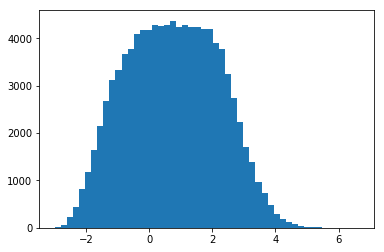

In [8]:
n = 100000
P = [0.3,0.5,0.2]
f = [
    myUniform,
    myPoisson1,
    myPoisson2
]
x = []
for i in range(n):
    x.append(acumuladaPonderada(P,f))
plt.hist(x, bins=50)

### Ejercicio 3 – Valor presente neto:

In [ ]:
def normal(mu, sigma):
    while True:
        # lambda = 1
        # funcion exponencial = lambda*e^{-lambda*X}
        # X = -(1 / lambda)*log_natural(U)
        Y1 = -1*(log(np.random.uniform()))
        Y2 = -1*(log(np.random.uniform()))
        Y = (Y2-((Y1-1)**2))/2
        if Y > 0:
            if np.random.uniform() < 0.5:
                return mu + sigma*Y
            else:
                return mu - sigma*Y

In [ ]:
def uniform(num1, num2):
    uniNum = np.random.uniform()
    rango = num2-num1
    return num1 + rango*uniNum

In [ ]:
# valor neto de 10%
# vpn = -I + sum(t=1, n){F / (1+ k)^{t}}
def vpn(t0, a):
    sumatoria = 0
    for i in range(len(a)-1):
        t = normal(a[i][0], a[i][1])
        sumatoria = sumatoria + (t/((1.01)**(i+1)))

    sumatoria = sumatoria + (uniform(a[len(a)-1][0],a[len(a)-1][1])/((1.01)**(len(a))))
    vpn = -t0 + sumatoria
    return vpn

In [14]:
L = [100, 1000, 10000]
for n in L:
    vpnH = 0
    vpnC = 0
    for i in range(n):
        # Hotel
        hotel = vpn(-800, [[-800, 50],[-800, 10], [-700, 150], [300, 200], [400, 200], [500, 200], [200, 8440]])
        vpnH +=hotel
        #centro comercial
        comercial = vpn(-900,[[-600, 50], [-200, 50], [-600, 100], [250, 150], [350, 150], [400, 150], [1600, 6000]])
        vpnC += comercial
    print("corridas realizadas: ", n)
    print("\tVPN Hotel: ", vpnH/n)
    print("\tVPN Centro Comercial: ", vpnC/n)
    

corridas realizadas:  100
	VPN Hotel:  3677.5745438554877
	VPN Centro Comercial:  4131.451328059507
corridas realizadas:  1000
	VPN Hotel:  3791.5059791970507
	VPN Centro Comercial:  4005.406574368643
corridas realizadas:  10000
	VPN Hotel:  3707.815934817359
	VPN Centro Comercial:  4012.5176348497585


### Ejercicio 4 – Repartidor de periódicos: